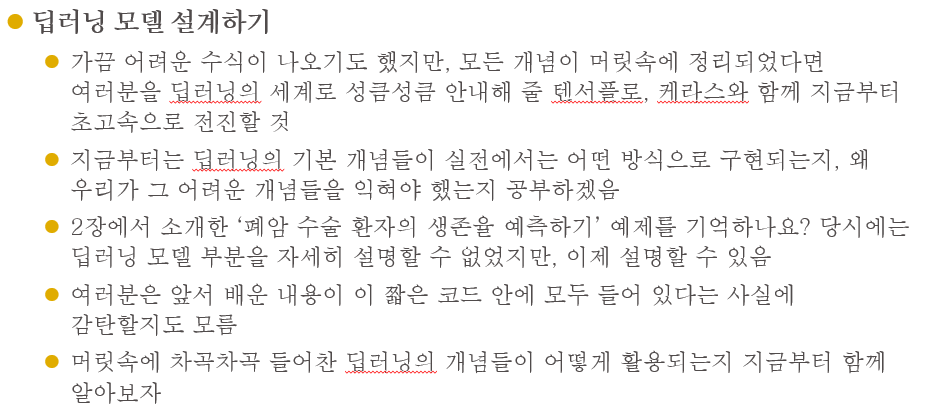

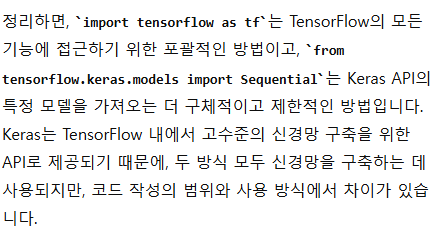

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import pandas as pd

In [51]:
!git clone https://github.com/taehojo/data.git # 깃허브에서 data 폴더를 통째로 가져올때 

fatal: Too many arguments.

usage: git clone [<options>] [--] <repo> [<dir>]

    -v, --[no-]verbose    be more verbose
    -q, --[no-]quiet      be more quiet
    --[no-]progress       force progress reporting
    --[no-]reject-shallow don't clone shallow repository
    -n, --no-checkout     don't create a checkout
    --checkout            opposite of --no-checkout
    --[no-]bare           create a bare repository
    --[no-]mirror         create a mirror repository (implies --bare)
    -l, --[no-]local      to clone from a local repository
    --no-hardlinks        don't use local hardlinks, always copy
    --hardlinks           opposite of --no-hardlinks
    -s, --[no-]shared     setup as shared repository
    --[no-]recurse-submodules[=<pathspec>]
                          initialize submodules in the clone
    --[no-]recursive ...  alias of --recurse-submodules
    -j, --[no-]jobs <n>   number of submodules cloned in parallel
    --[no-]template <template-directory>
            

In [52]:
Data_set = pd.read_csv('TS3.csv', header=None)
Data_set

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,2.88,2.16,1,0,0,0,1,1,3,0,0,0,1,0,60,0
1,2,3.40,1.88,0,0,0,0,0,0,1,0,0,0,1,0,51,0
2,2,2.76,2.08,1,0,0,0,1,0,0,0,0,0,1,0,59,0
3,2,3.68,3.04,0,0,0,0,0,0,0,0,0,0,0,0,54,0
4,2,2.44,0.96,2,0,1,0,1,1,0,0,0,0,1,0,73,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,1,3.88,2.12,1,0,0,0,1,0,2,0,0,0,1,0,63,0
466,2,3.76,3.12,0,0,0,0,0,0,0,0,0,0,1,0,61,0
467,2,3.04,2.08,1,0,0,0,1,0,2,0,0,0,0,0,52,0
468,2,1.96,1.68,1,0,0,0,1,1,1,0,0,0,1,0,79,0


In [53]:
X = Data_set.values[:,:16]
y = Data_set.values[:,16]

In [54]:
X.shape

(470, 16)

In [55]:
y.shape

(470,)

In [56]:
tf.__version__

'2.13.0'

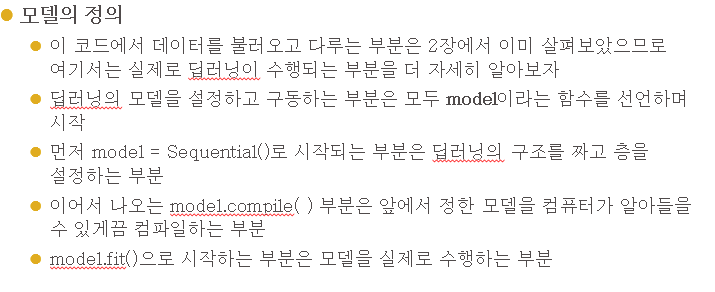

In [57]:
# 딥러닝의 구조를 짜고 층을 설정하는 부분은 다음과 같음 
model = Sequential()
# Sequential 모델을 생성합니다. 이 모델은 층(layer)을 순차적으로 쌓아가는 방식으로 구성됩니다.

model.add(Dense(30, input_dim=16, activation='relu'))
# 첫 번째 Dense 레이어를 추가합니다.
# 30: 이 레이어의 출력 노드 수를 30으로 설정합니다.
# input_dim=16: 입력 데이터의 특징(특성) 수를 16으로 설정합니다.
# activation='relu': ReLU(Rectified Linear Unit) 활성화 함수를 사용하여 비선형성을 추가합니다.

model.add(Dense(1, activation='sigmoid'))
# 두 번째 Dense 레이어를 추가합니다.
# 1: 이 레이어의 출력 노드 수를 1로 설정합니다.
# activation='sigmoid': 시그모이드(Sigmoid) 활성화 함수를 사용하여 출력값을 0과 1 사이로 만듭니다.
# 이 레이어는 이진 분류 문제에서 최종 출력층으로 자주 사용됩니다.


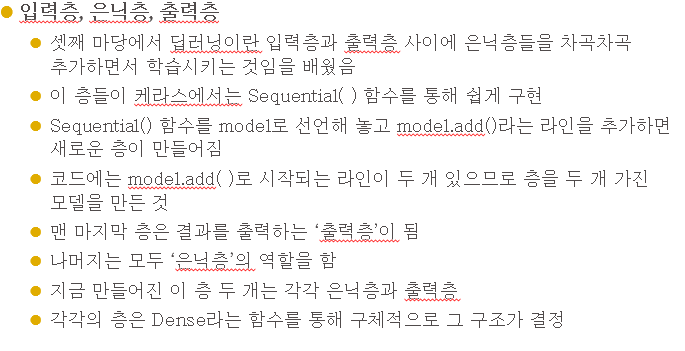

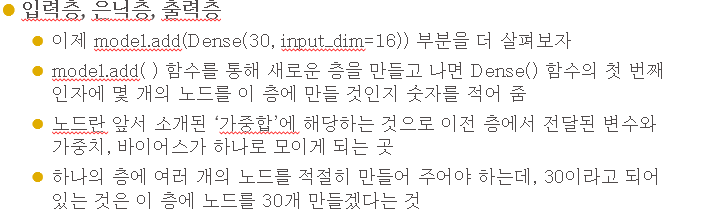

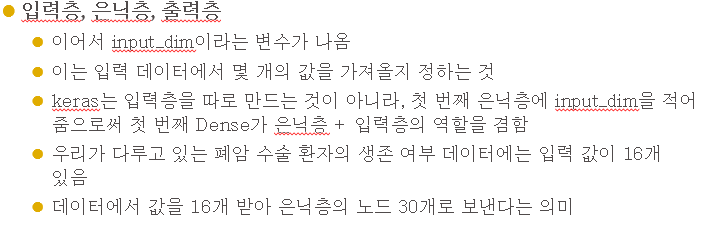

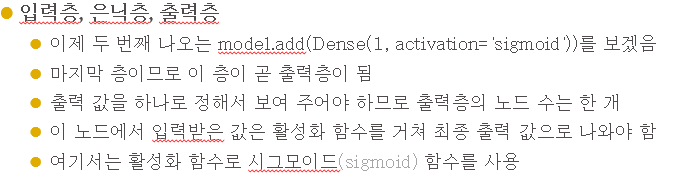

In [63]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# 모델을 컴파일합니다.
# loss='binary_crossentropy': 이진 분류 문제에서 사용하는 손실 함수로, 실제 레이블과 예측값 간의 차이를 계산합니다.
# optimizer='adam': Adam 최적화 알고리즘을 사용하여 모델의 가중치를 업데이트합니다.
# metrics=['accuracy']: 모델의 성능을 평가할 때 정확도를 기준으로 합니다.

history = model.fit(X, y, epochs=5, batch_size=32)
# 모델을 학습시킵니다.
# X: 입력 데이터(features).
# y: 출력 레이블(targets).
# epochs=5: 전체 데이터셋에 대해 5번 반복 학습합니다.
# batch_size=16: 한 번에 32개의 샘플씩 학습합니다. # 보통 32개가 기본값 

Epoch 1/5
15/15 [==============================] - 0s 1ms/step - loss: 0.4291 - accuracy: 0.8511
Epoch 2/5
15/15 [==============================] - 0s 1ms/step - loss: 0.4124 - accuracy: 0.8511
Epoch 3/5
15/15 [==============================] - 0s 929us/step - loss: 0.4089 - accuracy: 0.8511
Epoch 4/5
15/15 [==============================] - 0s 928us/step - loss: 0.4245 - accuracy: 0.8511
Epoch 5/5
15/15 [==============================] - 0s 857us/step - loss: 0.4155 - accuracy: 0.8511


In [61]:
470/32 # 나눴을대 약 15갸 나오기에 15

14.6875

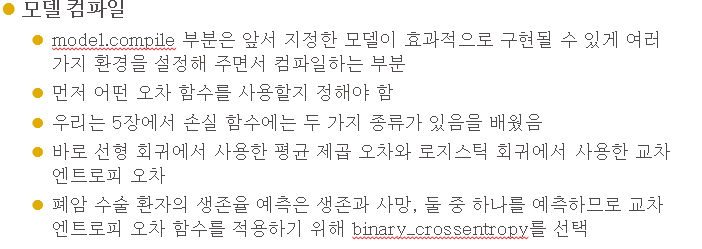

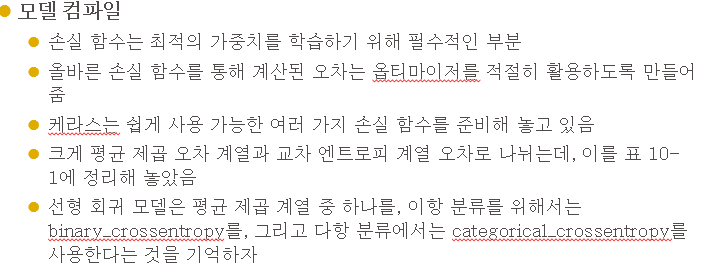

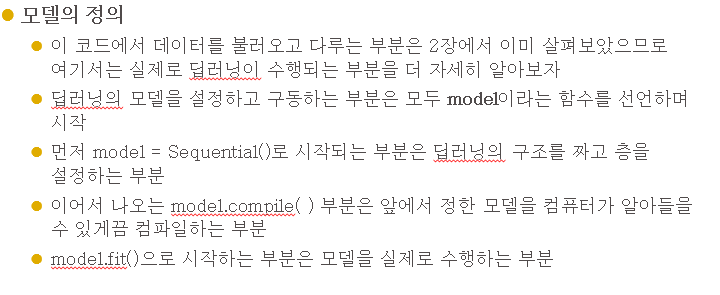

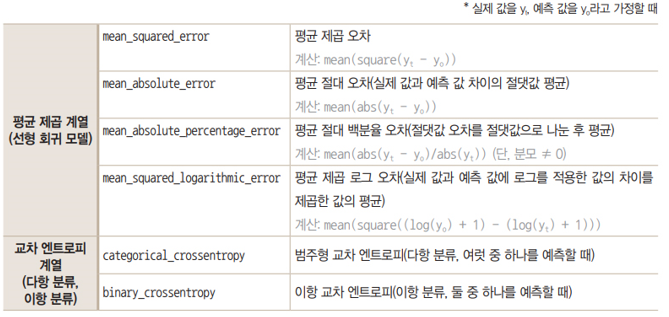

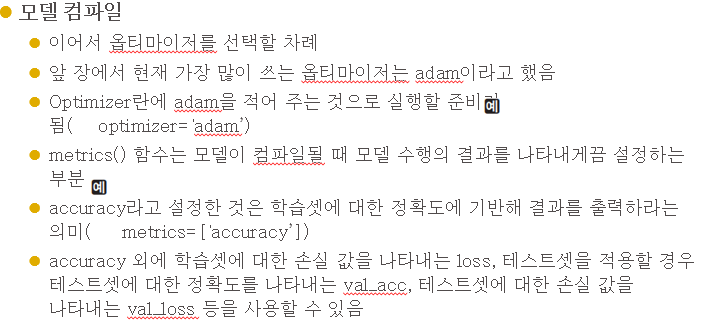

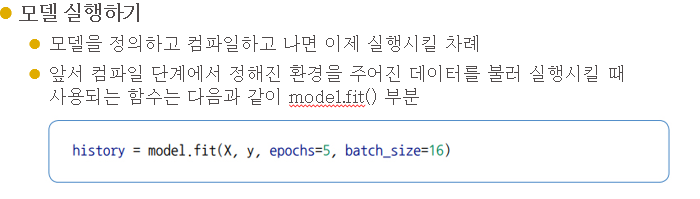

In [59]:
Data_set

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,2.88,2.16,1,0,0,0,1,1,3,0,0,0,1,0,60,0
1,2,3.40,1.88,0,0,0,0,0,0,1,0,0,0,1,0,51,0
2,2,2.76,2.08,1,0,0,0,1,0,0,0,0,0,1,0,59,0
3,2,3.68,3.04,0,0,0,0,0,0,0,0,0,0,0,0,54,0
4,2,2.44,0.96,2,0,1,0,1,1,0,0,0,0,1,0,73,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,1,3.88,2.12,1,0,0,0,1,0,2,0,0,0,1,0,63,0
466,2,3.76,3.12,0,0,0,0,0,0,0,0,0,0,1,0,61,0
467,2,3.04,2.08,1,0,0,0,1,0,2,0,0,0,0,0,52,0
468,2,1.96,1.68,1,0,0,0,1,1,1,0,0,0,1,0,79,0


In [60]:
Data_set.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], dtype='int64')

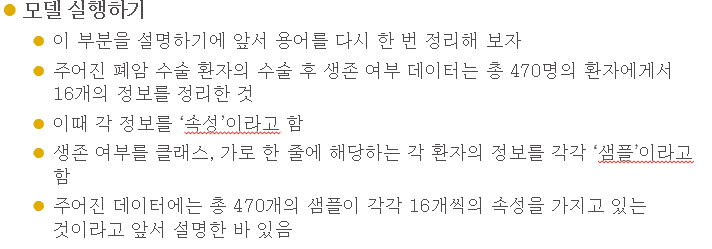

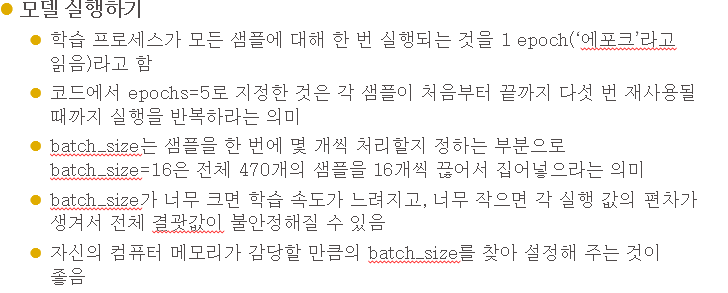